## ETL Pipeline and Data Analysis of Spotify Playlist Rapcavier

In [40]:
#import libraries
import pandas as pd
import os         
from sqlalchemy import create_engine
import sqlalchemy.types
import spotipy
import spotipy.util as util
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
os.environ['SPOTIPY_CLIENT_ID'] = '00b7317977ad4c0d971af8274f1aa790'
os.environ['SPOTIPY_CLIENT_SECRET'] = '6efbf45fe72d435f9739d0c0f4c26db5'
os.environ['SPOTIPY_REDIRECT_URI'] = 'https://360i.com/'
base_url = 'https://api.spotify.com'
scope = 'playlist-read-private'
# spotify:playlist:
rap_caviar = '37i9dQZF1DX0XUsuxWHRQd'

In [6]:
#create database connection
engine = create_engine('sqlite:///playlist_RC.db', echo=False)
conn=engine.connect()

In [7]:
token = util.prompt_for_user_token('Puffer Fish',scope=scope)



            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        
Opened https://accounts.spotify.com/authorize?client_id=00b7317977ad4c0d971af8274f1aa790&response_type=code&redirect_uri=https%3A%2F%2F360i.com%2F&scope=playlist-read-private in your browser


Enter the URL you were redirected to: https://www.360i.com/?code=AQB5UpU-6vdhv9VCptthIN4EnmT-b4bp36WvMQGAQ_NUXV_MHChObcYLFWpa3YECHgu7XIQ9ZU_LkoiMdFAj6Q4RDfjEWaYd738EpuUyaeWWaVohSq-vtLanw7Ait2XVGMMSdV-ijkuINTQRlROM9NKZxLpmJIMi16Wo4F9LDGUD_1M0QI1-jIXi034




### Data Extraction 

In [10]:
sp = spotipy.Spotify(auth=token)
playlists = sp.user_playlists('spotify')
df_tracks = pd.DataFrame(columns=['name', 'popularity', 'duration_ms', 'artist_name'])
df_artists = pd.DataFrame(columns=['id', 'a_name', 'a_popularity', 'followers','tracks'])
for playlist in playlists['items']:

            if rap_caviar in playlist['id']:
                print('Total songs in playlist', playlist['name'],'are', playlist['tracks']['total'])
                tracks=sp.playlist_tracks(playlist['id'],fields='items.track.name, items.track.artists, items.track.duration_ms,items.track.popularity', offset=0, market=None)

                count=0
                t=0
                for i in range(0,len(tracks['items'])):
                    try:
                        track_name=tracks['items'][i]['track']['name']
                    except:
                        track_name=''
                    try:
                        track_durations=tracks['items'][i]['track']['duration_ms']
                    except:
                        track_durations=''
                    try:
                        track_popularity=tracks['items'][i]['track']['popularity']
                    except:
                        track_popularity=''
                    try:    
                        tract_artist=tracks['items'][i]['track']['artists'][0]['name']
                    except:
                        track_artist=''
                    #df_tracks.loc[i]=[tracks['items'][i]['track']['name'],tracks['items'][i]['track']['duration_ms'],tracks['items'][i]['track']['popularity'],tracks['items'][i]['track']['artists'][0]['name']]
                    df_tracks.loc[i]=[track_name,track_popularity,track_durations,tract_artist]
                    count=count+1
                    for j in range(0, len(tracks['items'][i]['track']['artists'])):
                        try:
                            artist = sp.artist(tracks['items'][i]['track']['artists'][j]['uri'])
                            df_artists.loc[t,'a_name']=tracks['items'][i]['track']['artists'][j]['name']
                            df_artists.loc[t,'id']=tracks['items'][i]['track']['artists'][j]['id']
                            df_artists.loc[t,'tracks']=tracks['items'][i]['track']['name']
                            try:
                                df_artists.loc[t,'a_popularity']=artist['popularity']
                            except:
                                df_artists.loc[t,'a_popularity']=''
                            try:
                                df_artists.loc[t,'followers']=artist['followers']['total']
                            except:
                                df_artists.loc[t,'followers']=''
                                #df_artists.loc[t]=[tracks['items'][i]['track']['artists'][j]['id'],tracks['items'][i]['track']['artists'][j]['name'],artist['followers']['total'],artist['popularity']]
                            t=t+1
                        except:
                            df_artists.loc[t,'a_name']=tracks['items'][i]['track']['artists'][j]['name']
                            df_artists.loc[t,'id']=tracks['items'][i]['track']['artists'][j]['id']
                            df_artists.loc[t,'tracks']=tracks['items'][i]['track']['name']
                            #df_artists.loc[t,'a_popularity']=''
                            #df_artists.loc[t,'followers']=''
                            
                            #df_artists.loc[t]=[tracks['items'][i]['track']['artists'][j]['id'],tracks['items'][i]['track']['artists'][j]['name'],'','']
                            t=t+1
                            
                            pass
                        


Total songs in playlist RapCaviar are 50


In [12]:
df_tracks

,name,popularity,duration_ms,artist_name
0,Conversations,0,181661,Juice WRLD
1,Party Girl (Remix),0,147672,StaySolidRocky
2,For The Night (feat. Lil Baby & DaBaby),84,190476,Pop Smoke
3,"WHATS POPPIN (feat. DaBaby, Tory Lanez & Lil W...",87,227478,Jack Harlow
4,The Bigger Picture,86,252728,Lil Baby
5,Staccato,0,156559,Tory Lanez
6,Hate The Other Side (with Marshmello feat. Pol...,0,160212,Juice WRLD
7,DOLLAZ ON MY HEAD (feat. Young Thug),85,197760,Gunna
8,We Paid (feat. 42 Dugg),86,181929,Lil Baby
9,SWAG,0,153478,YG


In [13]:
df_artists

,id,a_name,a_popularity,followers,tracks
0,4MCBfE4596Uoi2O4DtmEMz,Juice WRLD,97,10368611,Conversations
1,1XLWox9w1Yvbodui0SRhUQ,StaySolidRocky,83,42827,Party Girl (Remix)
2,4O15NlyKLIASxsJ0PrXPfz,Lil Uzi Vert,94,9044459,Party Girl (Remix)
3,0eDvMgVFoNV3TpwtrVCoTj,Pop Smoke,93,833289,For The Night (feat. Lil Baby & DaBaby)
4,5f7VJjfbwm532GiveGC0ZK,Lil Baby,95,4362732,For The Night (feat. Lil Baby & DaBaby)
...,...,...,...,...,...
86,5K4W6rqBFWDnAN6FQUkS6x,Kanye West,93,11904957,Wash Us In The Blood
87,0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,98,10608868,Wash Us In The Blood
88,20sxb77xiYeusSH8cVdatc,Meek Mill,85,4199793,Otherside Of America
89,1zNqQNIdeOUZHb8zbZRFMX,Swae Lee,87,767310,Reality Check


### Loading Data into Database

In [14]:
#storing tracks data in a database
df_tracks.to_sql('tracks_database', con=engine, index=False, if_exists='replace',
                 dtype={"name":sqlalchemy.types.NVARCHAR(length=255), 
                        "popularity":sqlalchemy.types.Integer(),
                        "duration_ms":sqlalchemy.types.Integer(), 
                        "artist_name":sqlalchemy.types.NVARCHAR(length=255)})

In [15]:
#storing artists data in a database
df_artists.to_sql('artists_database', con=engine, index=False, if_exists='replace',
                 dtype={"id":sqlalchemy.types.NVARCHAR(length=255), 
                        "a_name":sqlalchemy.types.NVARCHAR(length=255),
                        "a_popularity":sqlalchemy.types.Integer(),
                        "followers":sqlalchemy.types.Integer(), 
                        "tracks":sqlalchemy.types.NVARCHAR(length=255)})  

### Data Analysis

In [18]:
#get the number of songs inside the playlist :RapCaviar"
song_in_playlist=pd.read_sql_query('select count(*) from tracks_database;',conn)

In [19]:
song_in_playlist

,count(*)
0,50


In [20]:
#which song is the longest:
query="""
        SELECT name, duration_ms
        FROM tracks_database
        where duration_ms=(SELECT MAX(duration_ms) FROM tracks_database)
        """
longest_song=pd.read_sql_query(query,con=engine)

In [21]:
longest_song

,name,duration_ms
0,The Bigger Picture,252728


In [22]:
longest_song = longest_song['name'].values[0]

In [23]:
longest_song

'The Bigger Picture'

In [24]:
#What are the top 5 tracks by artist follower count
query="""
        SELECT tracks, followers
        FROM artists_database
        ORDER BY followers DESC LIMIT 5;
        
      """
top_5_tracks_by_artist=pd.read_sql_query(query,con=engine)

In [27]:
top_5_tracks=top_5_tracks_by_artist['tracks']

In [28]:
top_5_tracks

0                     Chicago Freestyle (feat. Giveon)
1                       Pain 1993 (with Playboi Carti)
2    Hate The Other Side (with Marshmello feat. Pol...
3                                 Wash Us In The Blood
4                      Solitaires (feat. Travis Scott)
Name: tracks, dtype: object

In [32]:
#To find the relationship between artist_popularity and artist_popularity:
#perform a left join:
#assuming we are only considering artist_popularity for artists in the Tracks table:
query="""
        SELECT T.artist_name, T.popularity, A.a_popularity
        FROM tracks_database  T
        LEFT JOIN artists_database A
        ON T.artist_name=A.a_name
        Group By T.name
        
    """
left_join_tables=pd.read_sql_query(query,con=engine)

In [33]:
left_join_tables

,artist_name,popularity,a_popularity
0,Polo G,84,89.0
1,Lil Durk,71,83.0
2,Don Toliver,89,85.0
3,Mulatto,70,68.0
4,Lil Mosey,77,87.0
5,Polo G,80,89.0
6,A Boogie Wit da Hoodie,70,90.0
7,Gunna,81,92.0
8,Drake,89,100.0
9,Juice WRLD,0,NaN


In [35]:
corr= left_join_tables.corr(method='pearson')
print ("The corelation between track popularity and artist popularity is: \n", corr)

The corelation between track popularity and artist popularity is: 
               popularity  a_popularity
popularity       1.00000       0.22514
a_popularity     0.22514       1.00000


In [36]:
correletion=left_join_tables['a_popularity'].corr(left_join_tables['popularity'])
print('Correlation between artist popularity and track popularity is: %f' % correletion)

Correlation between artist popularity and track popularity is: 0.225140


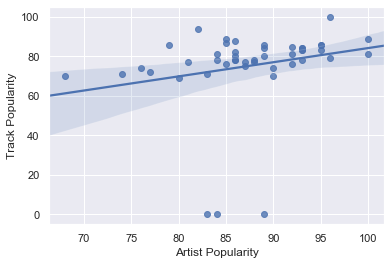

In [42]:
#plots to show visualizations:
sns.set(color_codes=True)
sns.regplot(pd.Series(left_join_tables["a_popularity"], name="Artist Popularity"), pd.Series(left_join_tables["popularity"],name="Track Popularity"), data=left_join_tables);